# Check tiles

In [49]:
import pandas as pd
import geopandas as gpd
import os
import sys
import importlib

ICESAT2_BOREAL_LIB_PATH = '/projects/code/icesat2_boreal/lib'   
sys.path.append(ICESAT2_BOREAL_LIB_PATH)
import maplib_folium
import mosaiclib
from mosaiclib import *

In [50]:
import folium

In [51]:
wrong_agb_version = [23780, 23779, 23776, 23778, 23217, 23497, 23498, 23499, 23777, 22938, 23219, 23218, 22937]
wrong_ht_version = [ 4107,  4344,  3840,  1796,  4176, 23219, 23827, 23780, 23779, 23777, 23218, 23776, 23778, 23217]

In [52]:
tindex_atl08_extract = pd.read_csv(ATL08_FILT_TINDEX_FN_DICT['2020'])
tindex_atl08_proc = pd.read_csv('/projects/my-public-bucket/DPS_tile_lists/ATL08/process_atl08_boreal/030m/2020/ATL08_filt_tindex_master.csv')

In [53]:
tindex_atl08_proc.shape

(4956, 7)

In [54]:
tindex_atl08_extract.shape

(4942, 7)

In [55]:
# This process_atl08 file in the 2020 set is wrong - do over
tindex_atl08_proc[tindex_atl08_proc.tile_num == 354000]

,index,s3_path,local_path,file,tile_num,n_obs,creation time
14,14,s3://maap-ops-workspace/montesano/data/process...,/projects/my-private-bucket/data/process_atl08...,atl08_006_030m_2019_2019_06_09_filt_354000.par...,354000,19,2024-03-05 07:39:02


In [56]:
# This extracted file in the 2020 set is wrong - do over
tindex_atl08_extract[tindex_atl08_extract.tile_num == 354000]

,index,s3_path,local_path,file,tile_num,n_obs,creation time
5,5,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_ext...,atl08_006_030m_2019_2019_06_09_filt_covars_354...,354000,19,2024-03-05 08:33:29


In [10]:
boreal_tiles = gpd.read_file(boreal_tile_index_path.replace('.gpkg','_model_ready.gpkg'))

In [36]:
boreal_tiles[boreal_tiles.tile_num.isin(tindex_atl08_proc.tile_num.to_list())].info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   tile_num      4956 non-null   int64   
 1   tile_version  4956 non-null   object  
 2   tile_group    4956 non-null   object  
 3   map_version   4956 non-null   object  
 4   n_obs         4956 non-null   int64   
 5   geometry      4956 non-null   geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 232.4+ KB


In [60]:
DPS_TILE_LIST_extract_covars = boreal_tiles[~boreal_tiles.tile_num.isin(tindex_atl08_extract.tile_num.to_list())].tile_num.to_list()
print(DPS_TILE_LIST_extract_covars)

[22937, 22938, 23217, 23218, 23219, 23497, 23498, 23499, 23776, 23777, 23778, 23779, 23780, 45970]


In [ ]:
m1 = boreal_tiles[boreal_tiles.tile_num.isin(wrong_agb_version)].explore(
    m = boreal_tiles[boreal_tiles.tile_num.isin(wrong_ht_version)].explore(
        m = boreal_tiles[~boreal_tiles.tile_num.isin(tindex_atl08_extract.tile_num.to_list())].explore(
            m = boreal_tiles.explore(color='gray', name='model ready', height=250),
            color='purple', name='w/o ATL08 extracted covars'),
        color='orange', name='missing ht'),
    color='yellow', name='missing agb'
    )
folium.LayerControl().add_to(m1)
m1

### Check for missing tiles

In [191]:
#tindex = pd.read_csv('/projects/my-public-bucket/DPS_tile_lists/run_build_stack_topo/build_stack_v2024_2/CopernicusGLO30/Topo_tindex_master.csv')
tindex = pd.read_csv(f'/projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/AGB_tindex_master.csv')
tindex = pd.read_csv(f'/projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/HT_tindex_master.csv')

In [192]:
tindex['creation_time'] = pd.to_datetime(tindex.file.str.split('_', expand=True)[3], format='%Y%m%d%H%M%S%f')

In [193]:
tindex[tindex.tile_num.isin([22937])]

,index,s3_path,local_path,file,tile_num,creation_time


In [ ]:
import pandas as pd
import json

json_meta_list = s3.glob('s3://..//.../..../output_*_context.json')
for fn in json_meta_list:

    try:

        with open(fn) as f:

            # Build dataframe of attributes
            df = pd.json_normalize(json.load(f), record_path=['features'])

In [ ]:
tindex.sort_values('creation_time').tail(92).head(20)

In [158]:
import plotnine
from plotnine import *

In [169]:
# (
#  ggplot(tindex, aes('creation_time'))
#     + geom_histogram()
# )

In [180]:
bad_subset = tindex[(tindex.creation_time > '2024-08-27') &
                    (tindex.creation_time < '2024-10-07')
                   ]
bad_subset.shape

(14, 6)

In [ ]:
bad_subset

In [154]:
print(bad_subset.tile_num.to_list())

[4107, 4344, 3840, 1796, 4176, 23219, 23827, 23780, 23779, 23777, 23218, 23776, 23778, 23217]


In [ ]:
fn = tindex[tindex.tile_num == 23827].s3_path.to_list()[0]
#fn = tindex[tindex.tile_num == 24108].s3_path.to_list()[0]
#fn = tindex[tindex.tile_num == 24389].s3_path.to_list()[0]
fn

In [120]:
import os
import sys
import importlib

ICESAT2_BOREAL_LIB_PATH = '/projects/code/icesat2_boreal/lib'   
sys.path.append(ICESAT2_BOREAL_LIB_PATH)

import build_stack
import rasterio

In [115]:
importlib.reload(build_stack)

<module 'build_stack' from '/projects/code/icesat2_boreal/lib/build_stack.py'>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 3000, 'height': 3000, 'count': 5, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",180],PARAMETER["standard_parallel_1",50],PARAMETER["standard_parallel_2",70],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 1898521.9999999953,
       0.0, -30.0, 9873304.00000001), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}


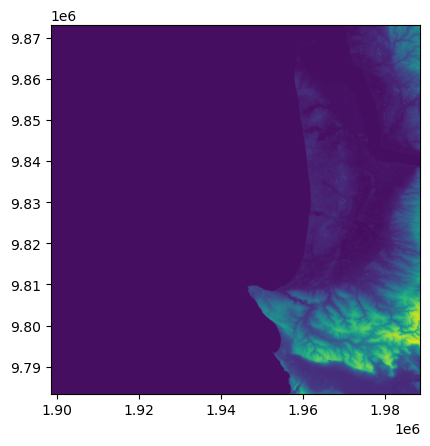

In [132]:
with rasterio.open(fn) as ds:
    print(ds.profile)
    rasterio.plot.show(ds)

-9999.0


<Axes: >

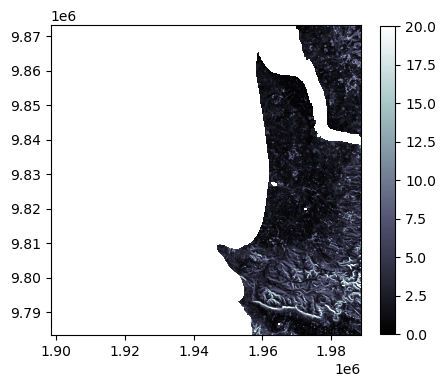

In [133]:
build_stack.show_raster(fn, BNUM=2, MAX_VALID=1e5, VMAX=20, cmap='bone')